In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [27]:
# Sample dataset
stages = ['App Download', 'Onboarding', 'Ticket Upload', 'Engagement','Feedback']
no_of_users= [589,500,300,190,62]

df = pd.DataFrame({'Stage':stages, 'No_of_user':no_of_users})
df

,Stage,No_of_user
0,App Download,589
1,Onboarding,500
2,Ticket Upload,300
3,Engagement,190
4,Feedback,62


In [28]:

# Calculate Conversion and Drop-Off Rates
df["conversion_rate"] = ((df["No_of_user"] / df["No_of_user"].iloc[0]) * 100).round(1)
df["drop_off_rates"] = df["conversion_rate"].diff().abs().round(1).fillna(0)

df

,Stage,No_of_user,conversion_rate,drop_off_rates
0,App Download,589,100.0,0.0
1,Onboarding,500,84.9,15.1
2,Ticket Upload,300,50.9,34.0
3,Engagement,190,32.3,18.6
4,Feedback,62,10.5,21.8


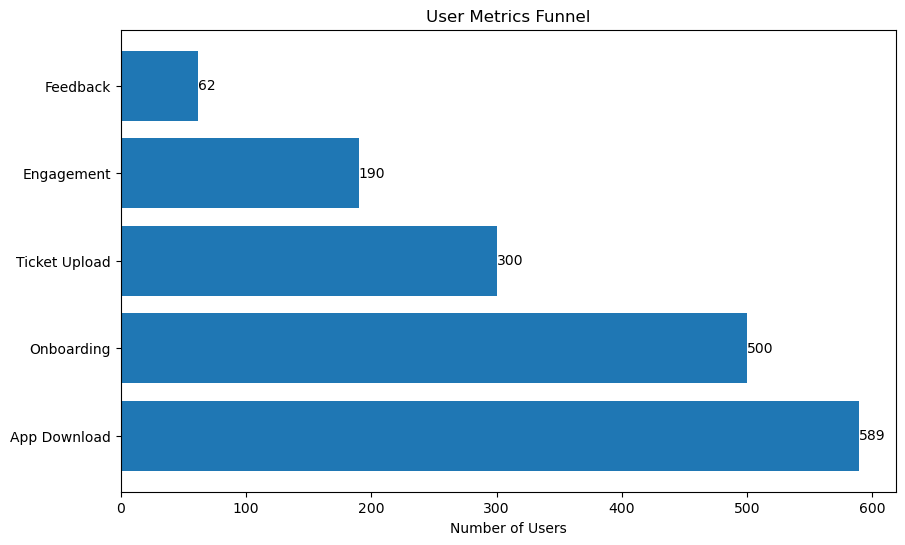

In [48]:

# Funnel Visualization
plt.figure(figsize=(10, 6))
plt.barh(df["Stage"], df["No_of_user"] )
plt.xlabel("Number of Users")
plt.title("User Metrics Funnel")

for index, value in enumerate(df['No_of_user']):
    plt.text(value, index, f'{value:.0f}', va='center', ha='left')
plt.show()



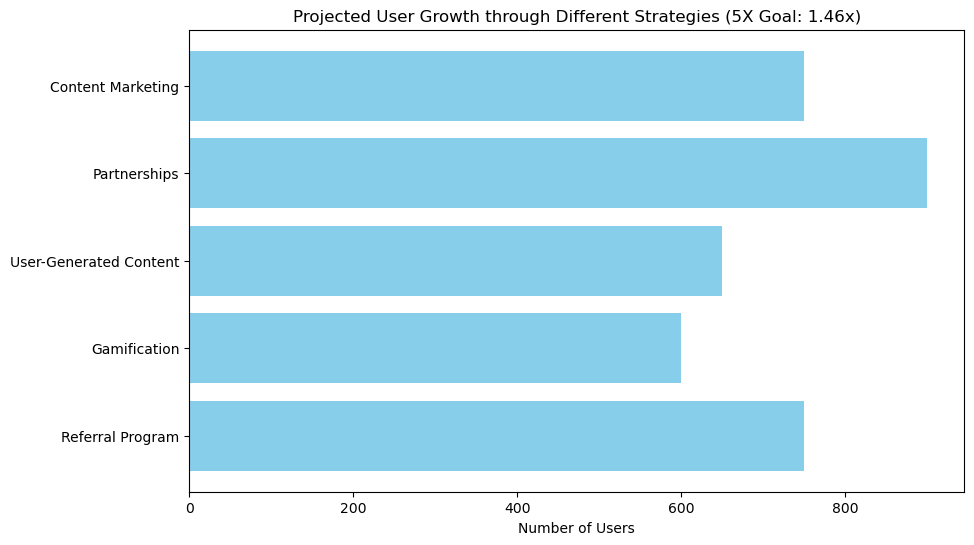

                 Strategy  Initial Users  Projected Users  Growth Factor
0        Referral Program            500            750.0            1.5
1            Gamification            500            600.0            1.2
2  User-Generated Content            500            650.0            1.3
3            Partnerships            500            900.0            1.8
4       Content Marketing            500            750.0            1.5
Total Projected Growth: 1.46x


In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data: initial users and projected growth through different strategies
strategies = ['Referral Program', 'Gamification', 'User-Generated Content', 'Partnerships', 'Content Marketing']
initial_users = [500, 500, 500, 500, 500]
growth_factors = [1.5, 1.2, 1.3, 1.8, 1.5]  # Estimated growth factor for each strategy

# Calculate the projected users after applying growth strategies
projected_users = [initial * growth for initial, growth in zip(initial_users, growth_factors)]

# Create a DataFrame for better visualization
df_growth = pd.DataFrame({
    'Strategy': strategies,
    'Initial Users': initial_users,
    'Projected Users': projected_users,
    'Growth Factor': growth_factors
})

# Calculate the total user acquisition growth (5X goal)
total_initial_users = sum(initial_users)
total_projected_users = sum(projected_users)
total_growth = total_projected_users / total_initial_users

# Plot the growth plan
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(df_growth['Strategy'], df_growth['Projected Users'], color='skyblue')
ax.set_xlabel('Number of Users')
ax.set_title(f'Projected User Growth through Different Strategies (5X Goal: {total_growth:.2f}x)')
plt.show()

# Display the DataFrame and total growth
print(df_growth)
print(f"Total Projected Growth: {total_growth:.2f}x")
